In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [147]:
x_train_encoding_df = pd.read_csv('C:/TIL/Team project/Semi pro1/x_train_encoding_df.csv')
x_test_encoding_df = pd.read_csv('C:/TIL/Team project/Semi pro1/x_test_encoding_df.csv')

x_train_encoding_new = pd.read_csv('C:/TIL/Team project/Semi pro1/x_train_encoding_new.csv')
x_test_encoding_new = pd.read_csv('C:/TIL/Team project/Semi pro1/x_test_encoding_new.csv')

y_train = pd.read_csv('C:/TIL/Team project/Semi pro1/y_train.csv')
y_test = pd.read_csv('C:/TIL/Team project/Semi pro1/y_test.csv')

In [149]:
x_train = np.array(x_train_encoding_df)
x_test = np.array(x_test_encoding_df)

x_train_new = np.array(x_train_encoding_new)
x_test_new = np.array(x_test_encoding_new)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [141]:
model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(learning_rate=0.01, loss='ls', max_depth=12,
                          n_estimators=1000)

In [142]:
mse = mean_squared_error(y_train, model.predict(x_train))
print("MSE: {}".format(mse))

MSE: 0.006165586619604863


In [143]:
mse = mean_squared_error(y_test, model.predict(x_test))
print("MSE: {}".format(mse))

MSE: 0.2203242063454109


Text(0, 0.5, 'Deviance')

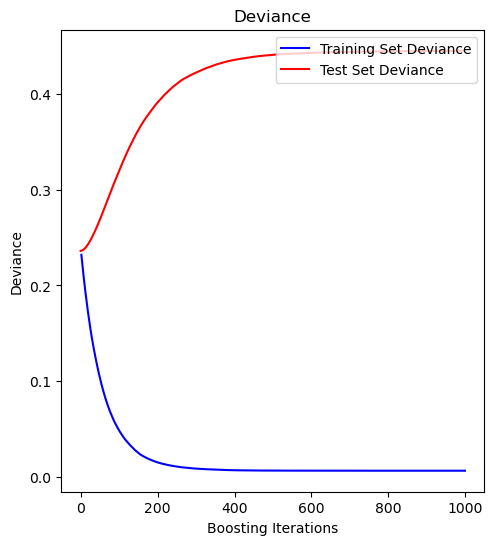

In [156]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(model.staged_predict(x_test)):
    test_score[i] = model.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, model.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

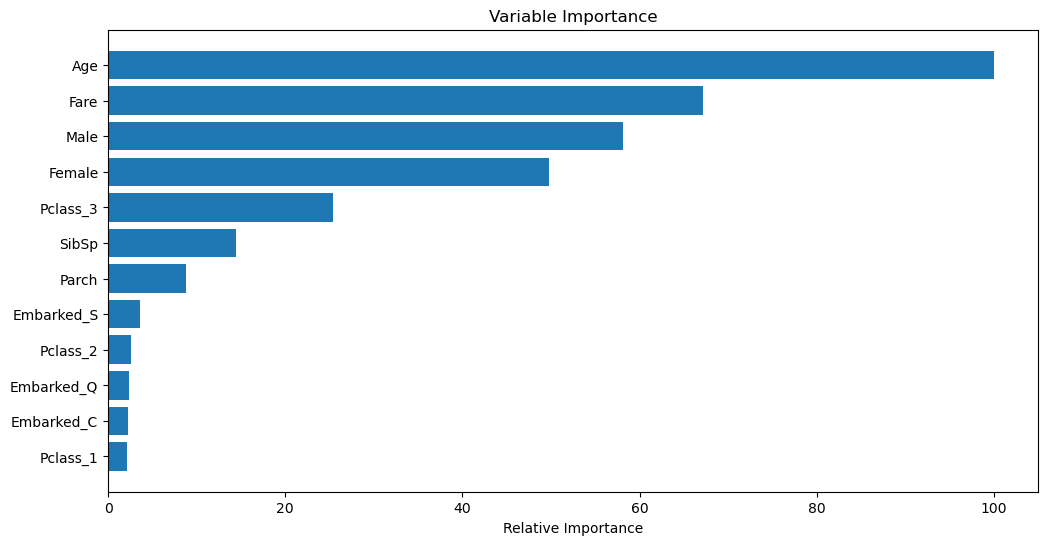

In [146]:
# Plot feature importance
feature_importance = model.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(x_train_encoding_df.columns)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Family 컬럼 포함

In [150]:
# Fit regression model
params = {'n_estimators': 1000, 'max_depth': 12, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model_2 = ensemble.GradientBoostingRegressor(**params)

model_2.fit(x_train_new, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(learning_rate=0.01, loss='ls', max_depth=12,
                          n_estimators=1000)

In [151]:
mse = mean_squared_error(y_train, model_2.predict(x_train_new))
print("MSE: {}".format(mse))

MSE: 0.006164086216010679


In [152]:
mse = mean_squared_error(y_test, model_2.predict(x_test_new))
print("MSE: {}".format(mse))

MSE: 0.23620039193575482


Text(0, 0.5, 'Deviance')

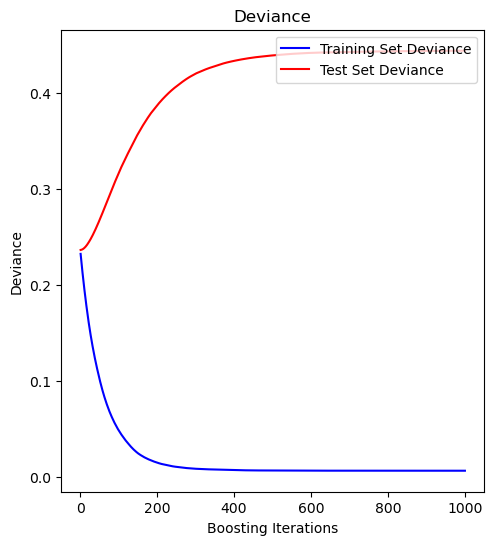

In [154]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(model_2.staged_predict(x_test_new)):
    test_score[i] = model_2.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, model_2.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

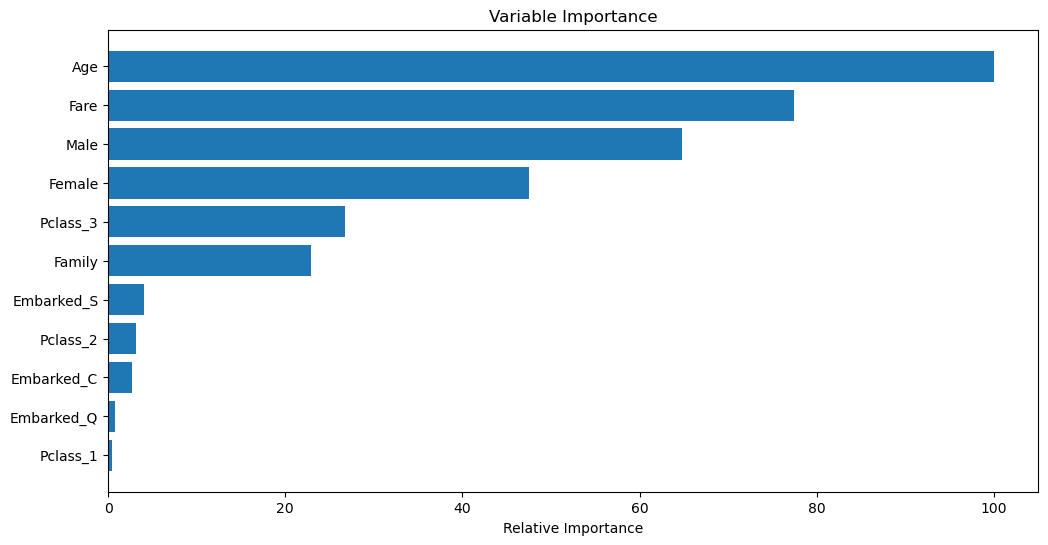

In [155]:
# Plot feature importance
feature_importance = model_2.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(x_train_encoding_new.columns)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()